In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
from scipy.ndimage.filters import gaussian_filter
from skimage.io import imread
from src.processing.constants import BUCKLING_PATH

In [29]:
bio_stack = imread(str(BUCKLING_PATH / '200920_biolight_nobg_nooutliers_despeckle_enhance.tif'))
bright_stack = imread(str(BUCKLING_PATH / '200920_normallight_nobg_edges_gaussblur_enhance.tif'))

In [43]:
slice_no_bio = 150
STACK_B_TO_N_RATIO = len(bio_stack) / len(bright_stack)
slice_no_bright = int(slice_no_bio / STACK_B_TO_N_RATIO)

In [55]:
def access_row_data(biolum, bright, row):

    if len(np.shape(biolum)) == 3: #if mulitchannel data
        bio_data = biolum[row, :, 0]
        bright_data = bright[row, :, 0]
        integers = list(range(1, len(bio_data)+1))

    if len(np.shape(biolum)) == 2: #if greyscale data
        bio_data = biolum[row, :]
        bright_data = bright[row, :]
        integers = list(range(1, len(bio_data) + 1))

    return integers, bio_data, bright_data

In [52]:
def intensity_profile_interactive(biolight_img, brightfield_img, gaussian_filter_sigma=None):

    if gaussian_filter_sigma != None:
        biolight_img =  gaussian_filter(biolight_img, sigma=gaussian_filter_sigma)
        brightfield_img =  gaussian_filter(brightfield_img, sigma=gaussian_filter_sigma)

    rows, columns = np.shape(biolight_img)

    #setup figure
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,10)
    plt.subplots_adjust(left = 0.1, bottom = 0.35)

    #subplot 1
    integers, bio_data, bright_data = access_row_data(biolight_img, brightfield_img, 600)
    bio_plot, = ax1.plot(integers, bio_data, label='bioluminescence')
    bright_plot, = ax1.plot(integers, bright_data, label='brightfield')
    ax1.legend(loc="upper right")
    ax1.set_xlabel('Column')
    ax1.set_ylabel('Pixel intensity')
    ax1.set_title('Intensity profile')

    #interactive slider setup
    axSlider = plt.axes([0.1, 0.2, 0.8, 0.05])
    row_slider = Slider(axSlider, 'row', valmin=1, valmax=1039, valstep=1)

    #subplot 2
    ax2.imshow(brightfield_img)
    line, = ax2.plot(np.zeros(columns), color='r', linestyle='-')
    ax2.set_title('Brightfield image')


    def val_update(val):
        row = row_slider.val
        bio_plot.set_ydata(access_row_data(biolight_img, brightfield_img, row)[1])
        bright_plot.set_ydata(access_row_data(biolight_img, brightfield_img, row)[2])
        line.set_ydata(row)
        plt.draw()

    row_slider.on_changed(val_update)

    plt.show()

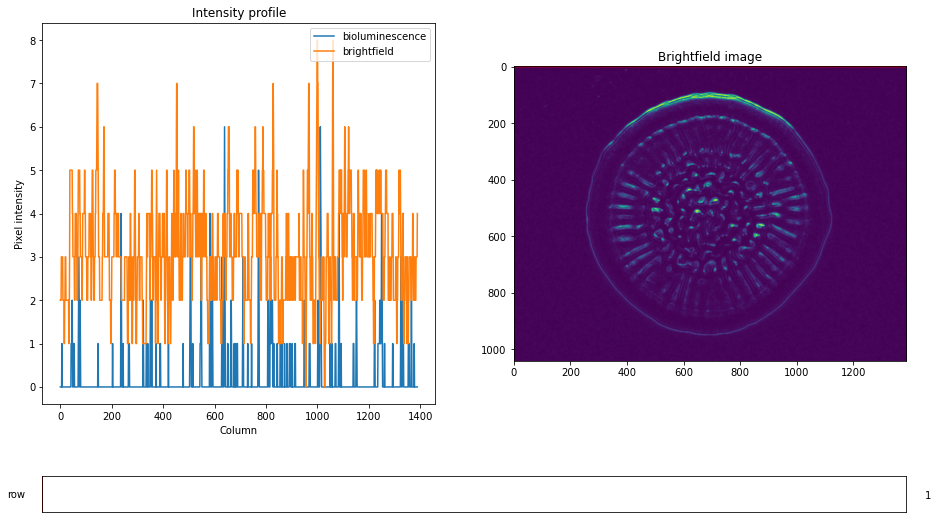

In [53]:
%matplotlib widget
%matplotlib inline
intensity_profile_interactive(bio_stack[slice_no_bio], bright_stack[slice_no_bright], 1)